In [1]:
# MINI DATA MINING PROJECT - BigBasket Products Analysis


In [3]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Load Dataset

df = pd.read_csv("C:/Users/ramit/OneDrive/Desktop/Mini_Project/BigBasket Products Analysis.csv")

print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Dataset Loaded Successfully!
Shape: (27555, 10)
Columns: ['index', 'product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description']


In [10]:
# Data Preprocessing

print("Checking missing values:")
print(df.isnull().sum())

# --- Remove Missing Values ---
df.dropna(inplace=True)
print("\nMissing values removed! New shape:", df.shape)

# --- Remove Duplicates ---
df.drop_duplicates(inplace=True)
print("\nDuplicates removed! New shape:", df.shape)

# --- Handle Outliers (Noisy Data) ---
numeric_cols = ['sale_price', 'market_price', 'rating']
for col in numeric_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]
print("\nOutliers handled! New shape:", df.shape)

# --- Encode Categorical Columns (EXCEPT 'brand') ---
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != 'brand':  # keep brand as text for plotting
        df[col] = le.fit_transform(df[col].astype(str))
print("\nCategorical columns encoded (brand kept as text)")

# --- Data Reduction (Optional for faster training) ---
if df.shape[0] > 5000:
    df = df.sample(5000, random_state=42)
    print("\nData reduced to 5000 rows for faster training.")

# --- Scale Numerical Features (Exclude target 'category' & text columns) ---
scaler = StandardScaler()
features_to_scale = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'category']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print("\nNumerical data scaled! (Target and brand excluded)")

Checking missing values:
index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

Missing values removed! New shape: (18840, 10)

Duplicates removed! New shape: (18840, 10)

Outliers handled! New shape: (15140, 10)

Categorical columns encoded (brand kept as text)

Data reduced to 5000 rows for faster training.

Numerical data scaled! (Target and brand excluded)


In [11]:
# Feature Selection & Splitting Dataset

X = df.drop(columns=['category', 'brand'])
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data Split Complete!")
print("Train:", X_train.shape, "| Test:", X_test.shape)

Data Split Complete!
Train: (3500, 8) | Test: (1500, 8)


In [12]:
# Train Model 

model = DecisionTreeClassifier(criterion="entropy", max_depth=15, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=42)

In [13]:
# Prediction & Accuracy

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 99.60%


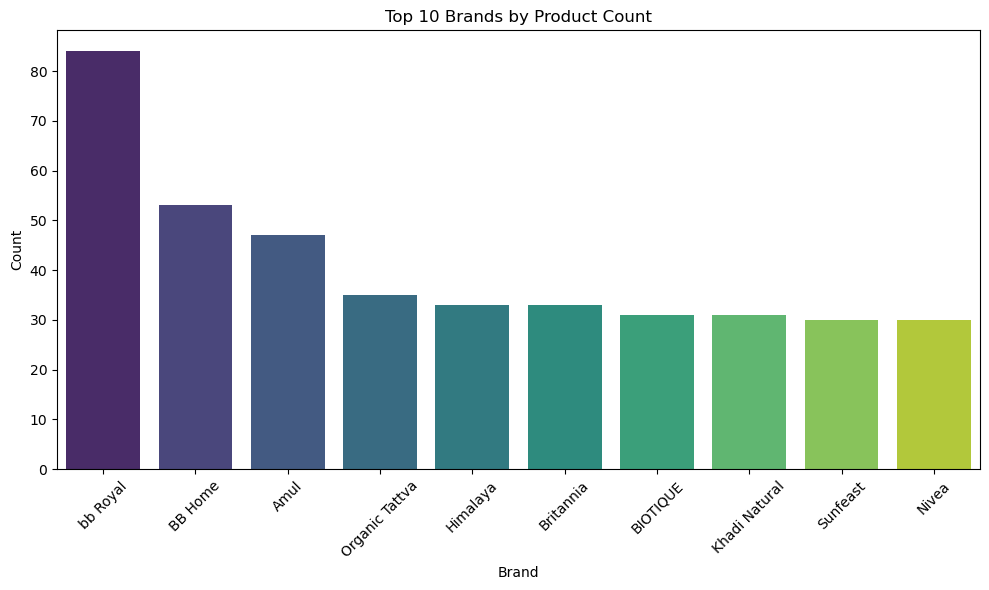

In [14]:
# Visualization Section

# --- Bar Chart: Top 10 Brands ---
if 'brand' in df.columns:
    top_brands = df['brand'].value_counts().nlargest(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
    plt.title('Top 10 Brands by Product Count')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

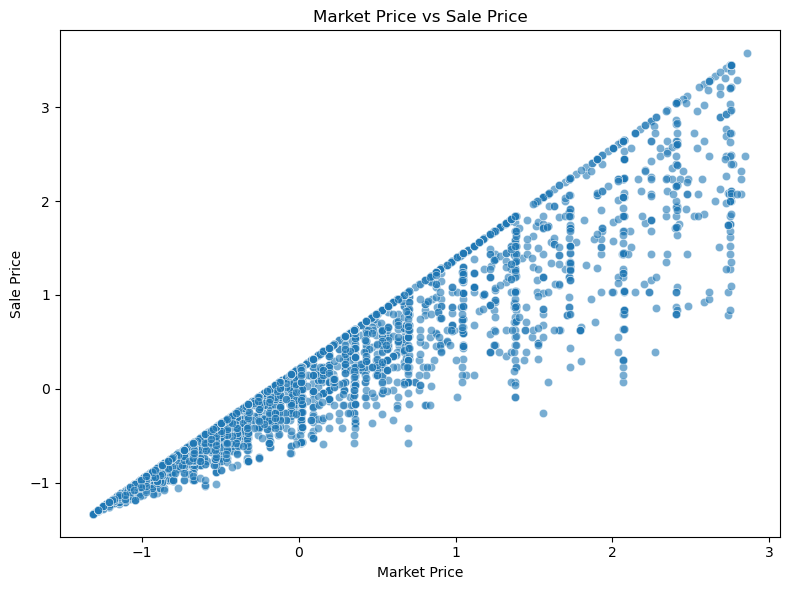

In [15]:
# --- Scatter Plot: Market vs Sale Price ---
plt.figure(figsize=(8,6))
sns.scatterplot(x='market_price', y='sale_price', data=df, alpha=0.6)
plt.title('Market Price vs Sale Price')
plt.xlabel('Market Price')
plt.ylabel('Sale Price')
plt.tight_layout()
plt.show()

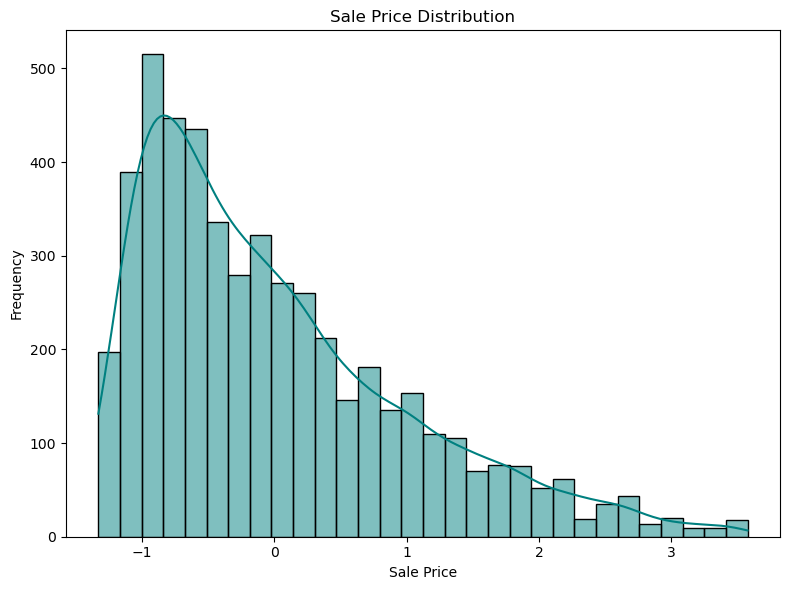

In [16]:
# --- Histogram: Sale Price Distribution ---
plt.figure(figsize=(8,6))
sns.histplot(df['sale_price'], bins=30, kde=True, color='teal')
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

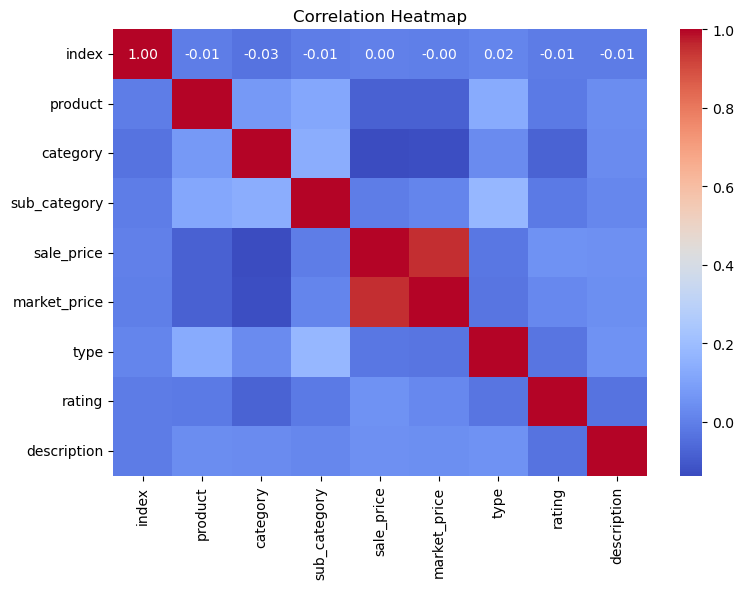

In [17]:
# --- Heatmap: Correlation Matrix ---
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

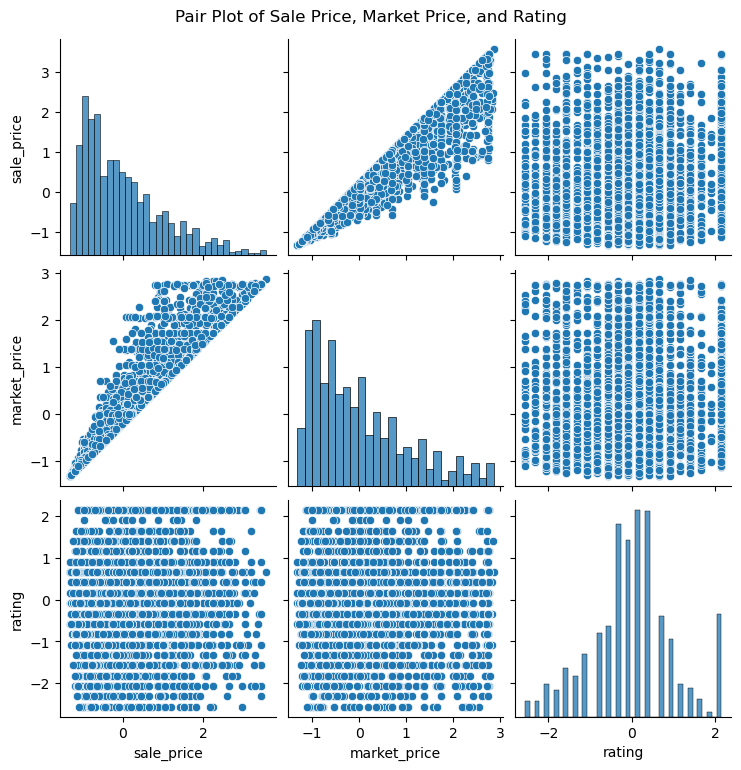

In [18]:
# --- Pair Plot: Selected Features ---
sns.pairplot(df[['sale_price', 'market_price', 'rating']])
plt.suptitle("Pair Plot of Sale Price, Market Price, and Rating", y=1.02)
plt.show()

In [20]:
# Save Model

import joblib

joblib.dump(model, "decision_tree_model.joblib")
print("Model saved successfully")

Model saved successfully
